                                    # FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

# Part 1: Data Preparation and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
df.size

15176

In [3]:
df.shape

(7588, 2)

In [4]:
# Parse the date column and set it as the index
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

Generated exchange_rate_time_series.png


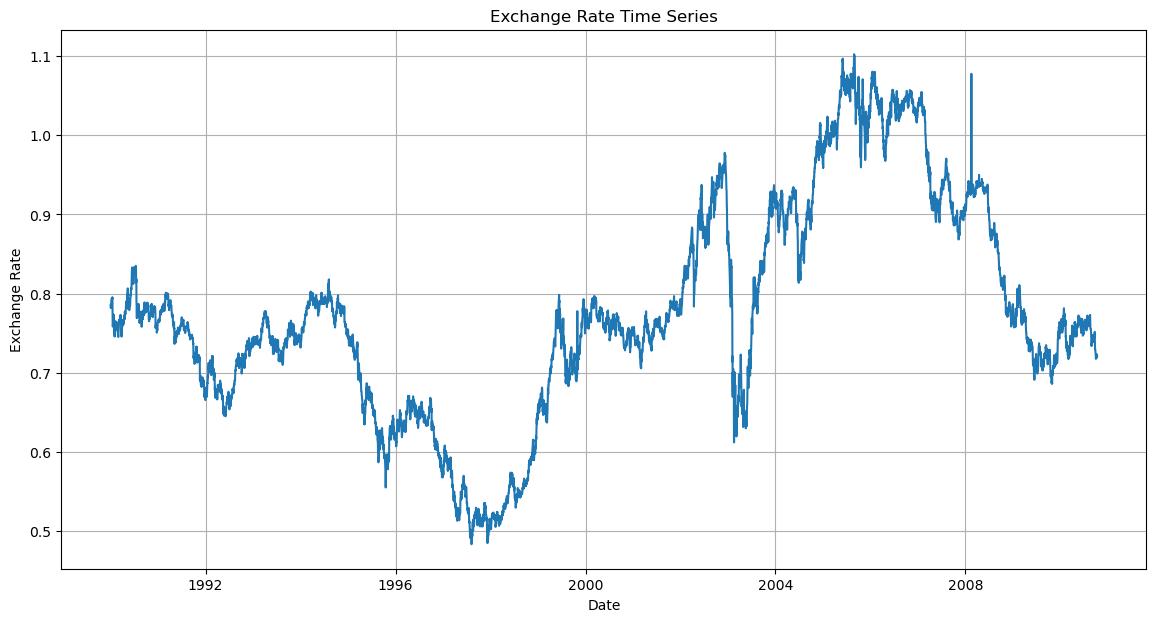

In [5]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
print("Generated exchange_rate_time_series.png")

In [6]:
df.isnull().sum().sum()

0

In [7]:
#The data has been loaded successfully, and the time series plot reveals clear trends but no obvious seasonality. There are no missing values to handle.

# Part 2: Model Building - ARIMA

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check for stationarity
adf_test = adfuller(df['Ex_rate'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -1.664994180738073
p-value: 0.44923273535983155


In [9]:
# The p-value is greater than 0.05, so we difference the series
df['diff_Ex_rate'] = df['Ex_rate'].diff().dropna()

Generated acf_pacf_plots.png


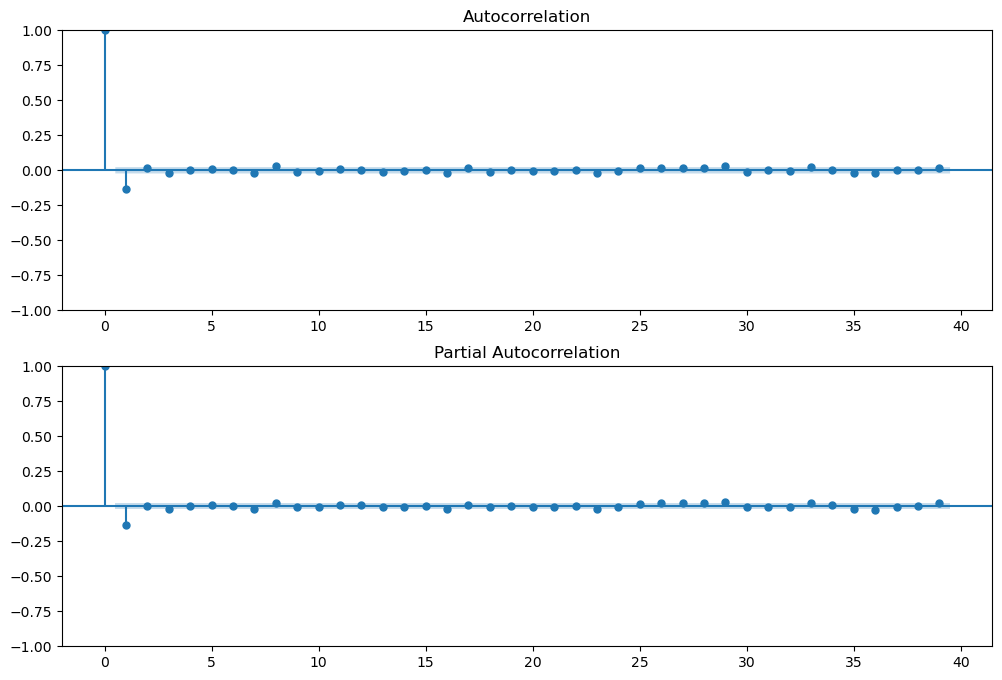

In [10]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['diff_Ex_rate'].dropna(), ax=ax1)
plot_pacf(df['diff_Ex_rate'].dropna(), ax=ax2)
print("Generated acf_pacf_plots.png")

# Part 2: Model Building - ARIMA (Corrected)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [12]:
# Load the dataset
df = pd.read_csv(r"D:\1st-EXCELR - DATA SCIENCE ALL CONCEPTS AND ASSIGNMENTS\Assignments\20th_AssignmentTime_Series\Timeseries\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [13]:
# Parse the date column and set it as the index
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

In [14]:
# Set frequency explicitly if the data is equally spaced daily/hourly etc.
# For example, if daily:
df = df.asfreq('D')

# -- Removed differencing here because ARIMA(p,d,q) with d=1 does differencing internally --

In [15]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()  # Added .copy() to avoid SettingWithCopy warning

In [16]:
# Fit the ARIMA model (p=5, d=1, q=0)
model = ARIMA(train['Ex_rate'], order=(5,1,0))
model_fit = model.fit()

In [17]:
model_fit

In [18]:
# Forecasting
predictions = model_fit.forecast(steps=len(test))

In [19]:
predictions

2006-08-15    1.023824
2006-08-16    1.023805
2006-08-17    1.023740
2006-08-18    1.023751
2006-08-19    1.023754
                ...   
2010-10-06    1.023758
2010-10-07    1.023758
2010-10-08    1.023758
2010-10-09    1.023758
2010-10-10    1.023758
Freq: D, Name: predicted_mean, Length: 1518, dtype: float64

In [20]:
# Assign predictions safely using .loc
test.loc[:, 'predictions'] = predictions.values

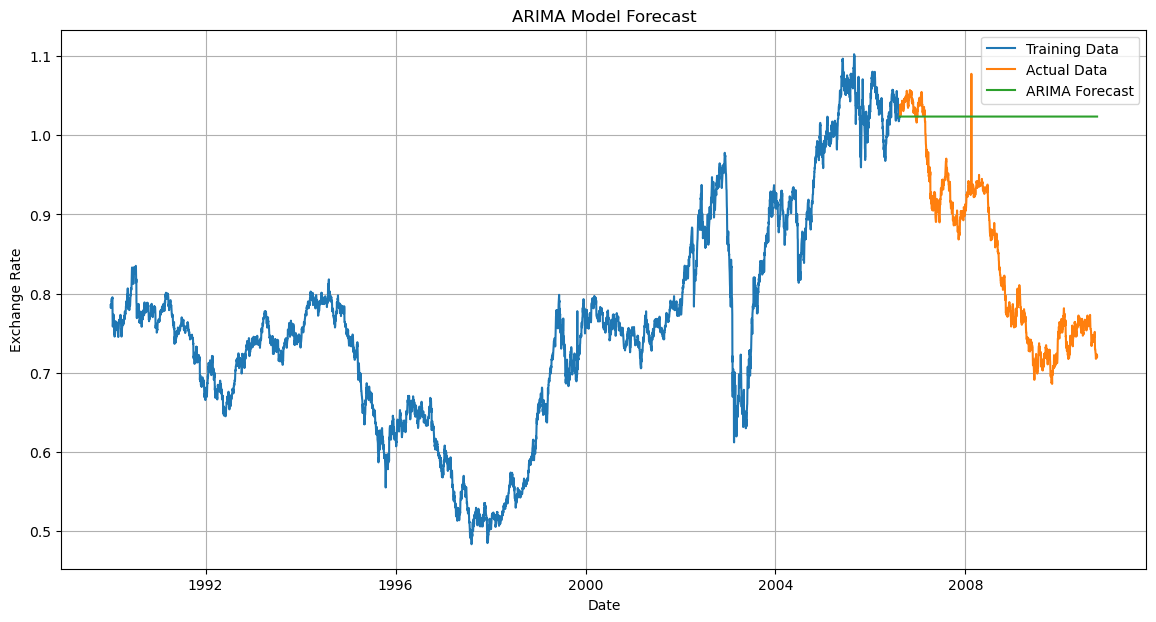

In [21]:
# Visualize the forecast
plt.figure(figsize=(14, 7))
plt.plot(train['Ex_rate'], label='Training Data')
plt.plot(test['Ex_rate'], label='Actual Data')
plt.plot(test['predictions'], label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Part 3: Model Building - Exponential Smoothing (Alternative)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv(r"D:\1st-EXCELR - DATA SCIENCE ALL CONCEPTS AND ASSIGNMENTS\Assignments\20th_AssignmentTime_Series\Timeseries\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [23]:
# Parse the date column and set it as the index
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

In [24]:
# Explicitly set the frequency if possible (e.g., daily 'D' if your data is daily)
df = df.asfreq('D')

In [25]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [26]:
# Fit the Exponential Smoothing model
model = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal=None)
model_fit = model.fit()

In [27]:
# Forecasting
predictions = model_fit.forecast(steps=len(test))
predictions

2006-08-15    1.023559
2006-08-16    1.023577
2006-08-17    1.023594
2006-08-18    1.023611
2006-08-19    1.023628
                ...   
2010-10-06    1.049524
2010-10-07    1.049541
2010-10-08    1.049558
2010-10-09    1.049576
2010-10-10    1.049593
Freq: D, Length: 1518, dtype: float64

In [28]:
# Assign predictions to test set using .loc to avoid SettingWithCopyWarning
test = test.copy()  # Make an explicit copy
test.loc[:, 'predictions'] = predictions.values

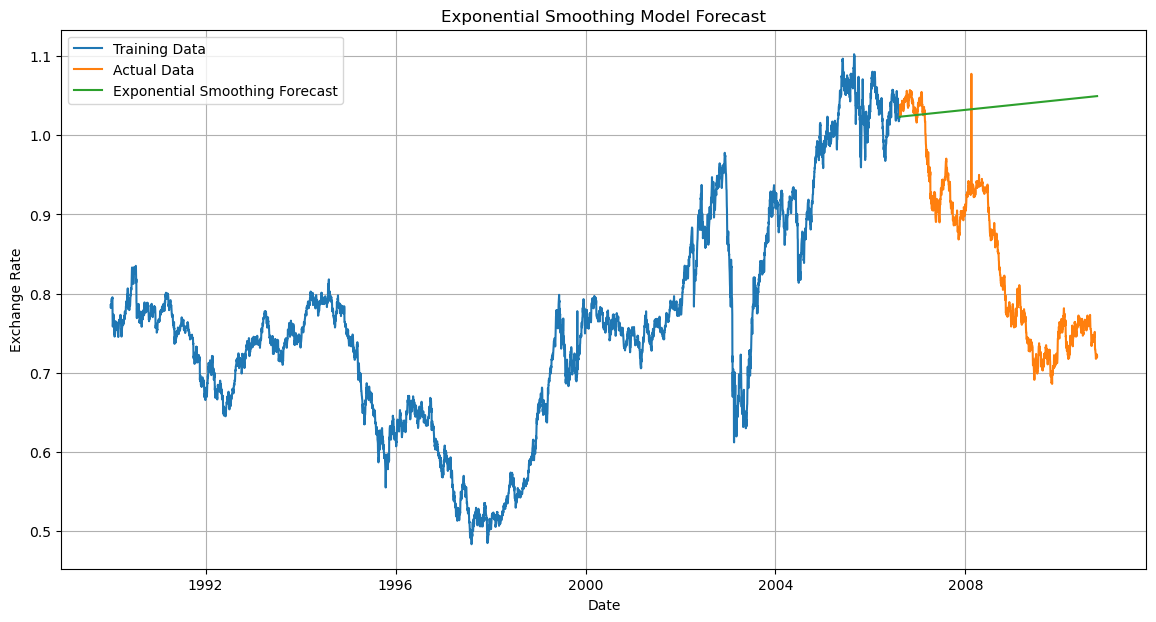

In [29]:
# Visualize the forecast
plt.figure(figsize=(14, 7))
plt.plot(train['Ex_rate'], label='Training Data')
plt.plot(test['Ex_rate'], label='Actual Data')
plt.plot(test['predictions'], label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Calculate error metrics
mae = mean_absolute_error(test['Ex_rate'], test['predictions'])
rmse = np.sqrt(mean_squared_error(test['Ex_rate'], test['predictions']))
mape = np.mean(np.abs((test['Ex_rate'] - test['predictions']) / test['Ex_rate'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 0.19027436194560823
RMSE: 0.22008623040234462
MAPE: 24.41281801209052%


# Part 3: Model Building - Simple Moving Average (Baseline)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv(r"D:\\1st-EXCELR - DATA SCIENCE ALL CONCEPTS AND ASSIGNMENTS\\Assignments\\20th_AssignmentTime_Series\\Timeseries\\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [32]:
# Parse the date column and set it as the index
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:].copy()  # create a copy to avoid warning


In [33]:
# Simple Moving Average Forecast
window_size = 50
predictions = train['Ex_rate'].rolling(window=window_size).mean().iloc[-1]
test['predictions'] = np.repeat(predictions, len(test))


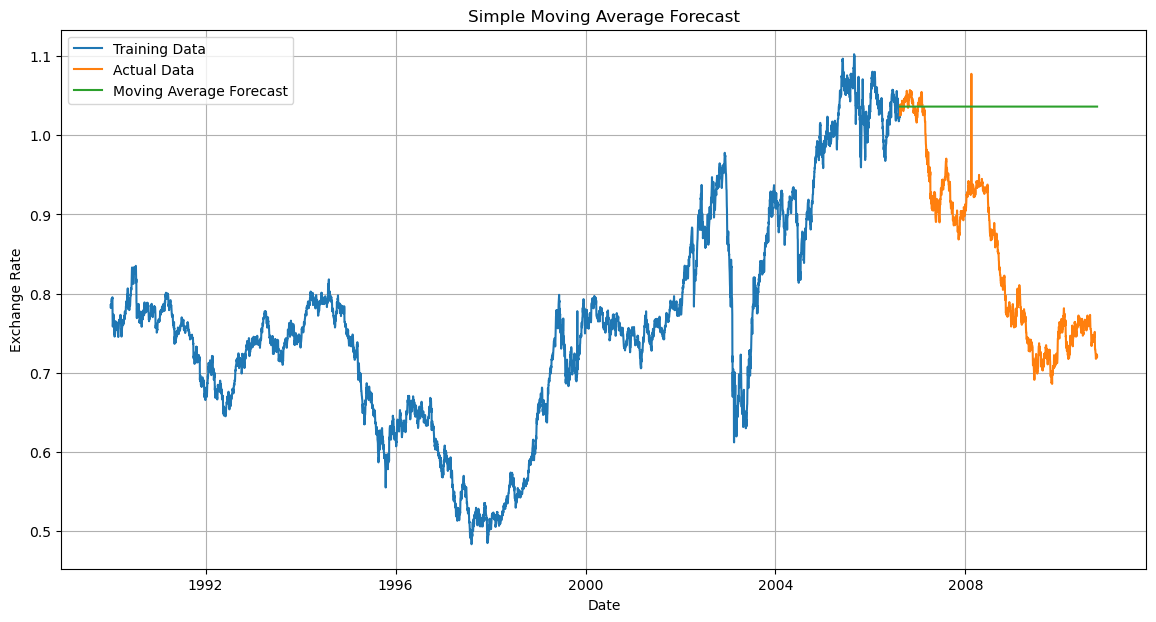

In [34]:
# Visualize the forecast
plt.figure(figsize=(14, 7))
plt.plot(train['Ex_rate'], label='Training Data')
plt.plot(test['Ex_rate'], label='Actual Data')
plt.plot(test['predictions'], label='Moving Average Forecast')
plt.title('Simple Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Calculate error metrics
mae = mean_absolute_error(test['Ex_rate'], test['predictions'])
rmse = np.sqrt(mean_squared_error(test['Ex_rate'], test['predictions']))
mape = np.mean(np.abs((test['Ex_rate'] - test['predictions']) / test['Ex_rate'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 0.1878253325164691
RMSE: 0.21629499442297
MAPE: 24.069192757742762%
